In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from scipy.signal import find_peaks

In [226]:
data_1=np.loadtxt("G7//test.dat", comments="#", unpack=False, skiprows=1)

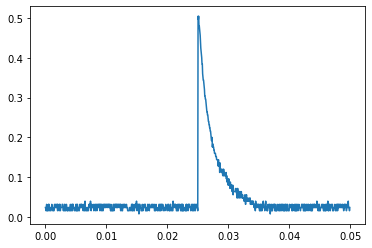

In [227]:
energy=data_1[:, 0]
count=data_1[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [228]:
def exponential(x, a, b,x0,y0):
    return a*np.exp(-b*(x-x0)) + y0

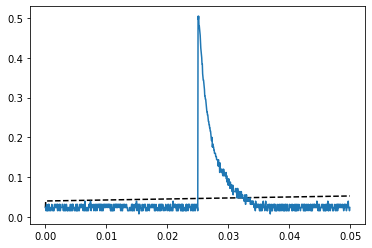

In [229]:
def f(x,a,b,x0,y0,y1): 
    return (0.5 * (np.sign(x) + 1)*exponential(x, a, b,x0,y0))+y1
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[0.5, 0.5,0,0,0.1],bounds=(-np.inf, np.inf),maxfev=10000)#, bounds=(-np.inf, np.inf))
plt.plot(energy, f(energy, *pars), 'k--')
plt.plot(energy,count)

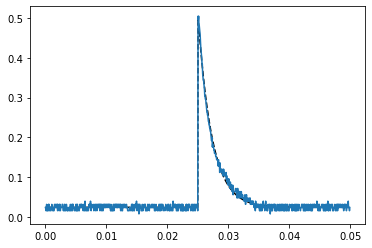

In [230]:
def f(x,a,b,x0,y0): 
    return (0.5 * (np.sign(x-x0) + 1)*a*np.exp(-b*(x-x0))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[0.5, 0.5,0.025,0],bounds=(-np.inf, np.inf),maxfev=10000)#, bounds=(-np.inf, np.inf))
plt.plot(energy, f(energy, *pars), 'k--')
plt.plot(energy,count)

In [231]:
data_2=np.loadtxt("G7//FID_0.1m12Uhr45_pnmr.dat", comments="#", unpack=False, skiprows=1)

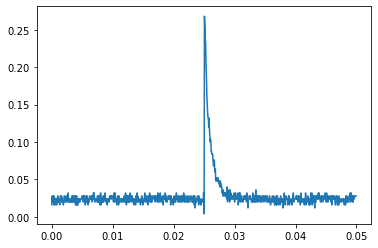

In [232]:
energy=data_2[:, 0]
count=data_2[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

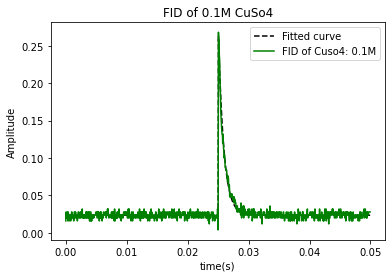

[[-5.38371209e+10 -2.40523944e+05  1.91852012e+08 -2.67541015e-01]
 [-2.40523933e+05  1.75262802e+02  8.57122438e+02  3.63609712e-04]
 [ 1.91852012e+08  8.57122477e+02 -6.83676874e+05  9.53399470e-04]
 [-2.67541051e-01  3.63609712e-04  9.53399598e-04  2.01829498e-08]]
[2.52798694e-01 1.11008158e+03 2.50000678e-02 2.36503000e-02]
13.238685812671797


In [233]:
def f(x,a,b,x0,y0): 
    return (0.5 * (np.sign(x-x0) + 1)*a*np.exp(-b*(x-x0))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[0.5, 0.5,0.025,0],bounds=(-np.inf, np.inf),maxfev=10000)#, bounds=(-np.inf, np.inf))
plt.plot(energy, f(energy, *pars), 'k--',label='Fitted curve')
plt.plot(energy,count,'g',label='FID of Cuso4: 0.1M')
plt.legend(loc='best')
plt.title('FID of 0.1M CuSo4')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.show()
print(cov)
print(pars)
print(np.sqrt(cov[1,1]))

In [552]:
data_3=np.loadtxt("G7//spin_echo0,1mM", comments="#", unpack=False, skiprows=1)

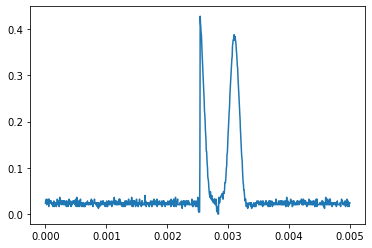

In [553]:
energy=data_3[:, 0]
count=data_3[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

C:\Users\localadmin\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


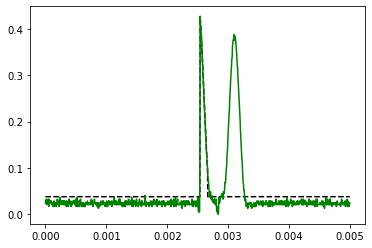

In [554]:
def f(x,a,b,x0,y0,t,x2,d): 
    return ((a/2)* (np.sign(x-x0) + 1)*np.exp(-b*(x-x0))*(np.cos(t*(x-x0)))**2)*((d/2)*(np.sign(-x+x2) + 1)) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[0.5, 530,0.0025,0.001,6100,0.00266,0.1],bounds=(-np.inf, np.inf),maxfev=10000)#bounds=(-np.inf, np.inf)          
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve') 
plt.plot(energy,count,'g',label='Carr-Purcell of CuSo4:0.1M')

#bounds=( (0.5, 650, -np.inf, 0.0, -np.inf,-np.inf,0.1 ),(np.inf, 730, np.inf, 0.01,np.inf,np.inf,0.3))

[4.00000000e-01 2.50000000e-03 1.99185023e-02 6.02554745e+07
 3.70099381e-01 8.73196080e+07 3.10130952e-03]
0.006045996584205777


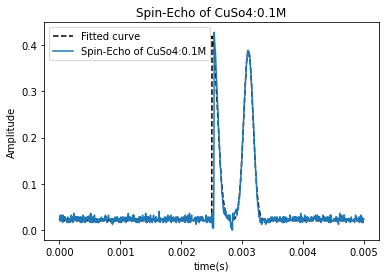

In [555]:
def f(x,a1,x0,y0,b1,a2,b2,x1): 
    return ( 0.5*(np.sign(x-x0) + 1)*(a1*(np.exp(-b1*(x-x0)**2))) + a2*(np.exp(-b2*(x-x1)**2))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[ 0.5,0.00262,0.01,7000,0.4,7000,0.0031],bounds=( ( 0.4,0.0025,0.01, -np.inf,0.35,-np.inf,0.0031 ),(0.5, 0.00263, 0.03,np.inf,0.40,np.inf,0.0035)),maxfev=10000)#bounds=(-np.inf, np.inf)          
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve') 
plt.plot(energy,count,label='Spin-Echo of CuSo4:0.1M')
print(pars)
plt.legend(loc='best')
plt.title('Spin-Echo of CuSo4:0.1M')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
#bounds=( ( 0.4,0.0025,0.01, -np.inf,0.35,-np.inf,0.0031 ),(0.5, 0.0026, 0.03,np.inf,0.40,np.inf,0.0035))
a1=pars[0]
a2=pars[4]
x1=pars[6]
x0=pars[1]
y0=pars[2]
b=-(np.log((a2/a1)-y0))/(x1-x0)
print(1/b)
plt.show()

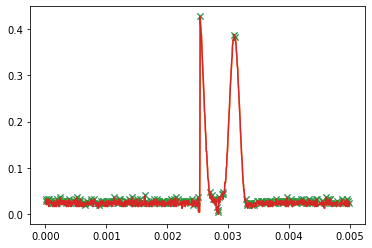

In [556]:
peaks, _ = find_peaks(count) 

plt.plot(energy[peaks], count[peaks], "x")
plt.plot(energy,count,label='recorded data')

pars, cov = curve_fit(exponential, xdata=peaks, ydata=count[peaks], p0=[ 0.0,0.1,500,0.1],bounds=(-np.inf, np.inf),maxfev=10000)#, bounds=(-np.inf, np.inf))
#plt.plot(peaks, exponential(peaks, *pars), 'k--')
#plt.plot(energy,count)
#print((peaks))
p=(energy[peaks])
#print(p)
#print(count[peaks])
plt.plot(p, count[peaks], "x")
plt.plot(energy,count,label='recorded data')

In [557]:
data_4=np.loadtxt("G7//New folder//cp0,1.dat", comments="#", unpack=False, skiprows=1)

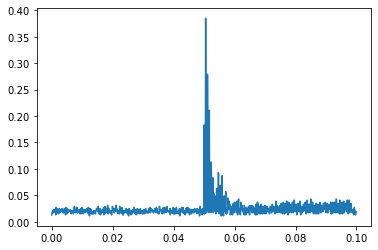

In [558]:
energy=data_4[:, 0]
count=data_4[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

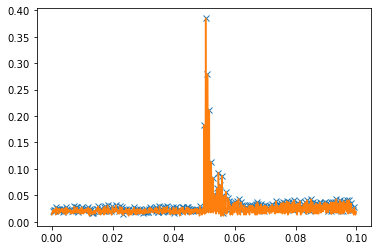

In [559]:
peaks, _ = find_peaks(count) 
#plt.plot(peaks, count[peaks], "x")
# def exponential(peaks, a, b,x0,y0):
#     return a*np.exp(-b*(peaks-x0)) + y0
pars, cov = curve_fit(exponential, xdata=peaks, ydata=count[peaks], p0=[ 0.0,0.1,500,0.1],bounds=(-np.inf, np.inf),maxfev=10000)#, bounds=(-np.inf, np.inf))
#plt.plot(peaks, exponential(peaks, *pars), 'k--')
#plt.plot(energy,count)
#print((peaks))
p=(energy[peaks])
#print(p)
#print(count[peaks])
plt.plot(p, count[peaks], "x")
plt.plot(energy,count,label='recorded data')

<ipython-input-560-4f4c425f0a7a>:4: RuntimeWarning: overflow encountered in exp
  return (0.752 * (np.sign(peaks-x0) + 1)*a*np.exp(-b*(peaks-x0))) +y0
<ipython-input-560-4f4c425f0a7a>:4: RuntimeWarning: overflow encountered in multiply
  return (0.752 * (np.sign(peaks-x0) + 1)*a*np.exp(-b*(peaks-x0))) +y0


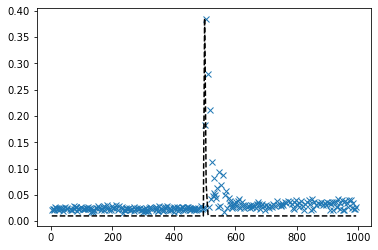

In [560]:
peaks, _ = find_peaks(count) 
plt.plot(peaks, count[peaks], "x")
def f(peaks,a,b,x0,y0): 
    return (0.752 * (np.sign(peaks-x0) + 1)*a*np.exp(-b*(peaks-x0))) +y0
pars, cov = curve_fit(f, xdata=peaks, ydata=count[peaks], p0=[0.5, 0.5,500,0.01],bounds=(-np.inf, np.inf),maxfev=10000)#, bounds=(-np.inf, np.inf))
plt.plot(peaks, f(peaks, *pars), 'k--')
# plt.plot(energy,count)

In [561]:
data_5=np.loadtxt("G7//cp0,1.dat", comments="#", unpack=False, skiprows=1)

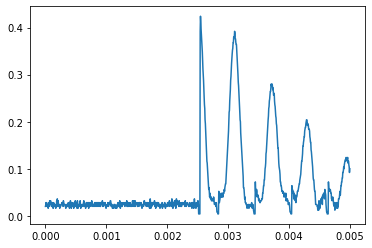

In [26]:
energy=data_5[:, 0]
count=data_5[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [22]:
data_6=np.loadtxt("G7//MG_0,1.dat", comments="#", unpack=False, skiprows=1)

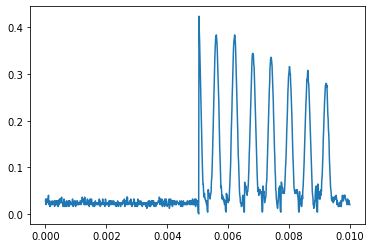

In [23]:
energy=data_6[:, 0]
count=data_6[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [562]:
data_7=np.loadtxt("G7//inv_rec_0,1m.dat", comments="#", unpack=False, skiprows=1)

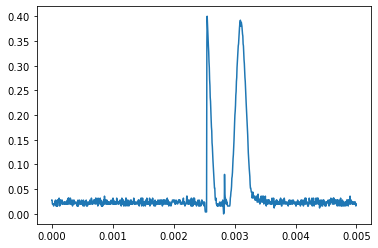

In [563]:
energy=data_7[:, 0]
count=data_7[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

[3.90000000e-01 2.51000000e-03 2.04770754e-02 8.33578544e+07
 3.72679464e-01 8.54143532e+07 3.10306590e-03]
0.00014826647603229115


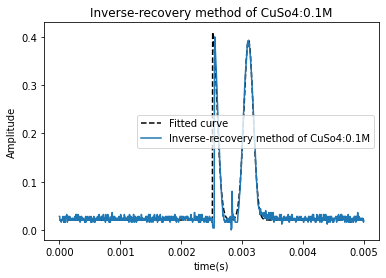

In [564]:
def f(x,a1,x0,y0,b1,a2,b2,x1): 
    return ( 0.5*(np.sign(x-x0) + 1)*(a1*(np.exp(-b1*(x-x0)**2))) + a2*(np.exp(-b2*(x-x1)**2))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[ 0.41,0.00262,0.01,7000,0.36,6500,0.0031],bounds=( ( 0.39,0.00251,0.01, -np.inf,0.35,-np.inf,0.0031 ),(0.43, 0.0027, 0.03,np.inf,0.39,np.inf,0.0036)),maxfev=10000)#bounds=(-np.inf, np.inf)          
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve') 
plt.plot(energy,count,label='Inverse-recovery method of CuSo4:0.1M')
print(pars)
plt.legend(loc='best')
plt.title('Inverse-recovery method of CuSo4:0.1M')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
#bounds=( ( 0.39,0.00251,0.01, -np.inf,0.35,-np.inf,0.0031 ),(0.43, 0.0027, 0.03,np.inf,0.39,np.inf,0.0036))
x1=pars[6]
x0=pars[1]
period=(x1-x0)/2
rise_time=(period/2)
print(rise_time)



In [432]:
data_8=np.loadtxt("G7//0,01rough_inv_recov", comments="#", unpack=False, skiprows=1)

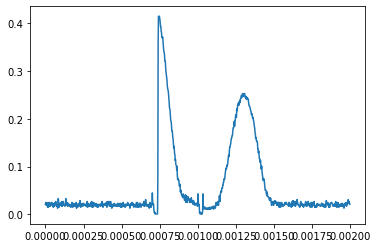

In [102]:
energy=data_8[:, 0]
count=data_8[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [147]:
data_9=np.loadtxt("G7//FID_0,2M(good).dat", comments="#", unpack=False, skiprows=1)

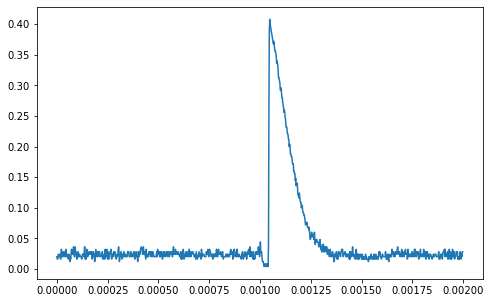

In [148]:
##Enlarged image###
energy=data_9[:, 0]
count=data_9[:, 1]
plt.figure(2,figsize=(8,5))
plt.plot(energy,count,label='recorded data')


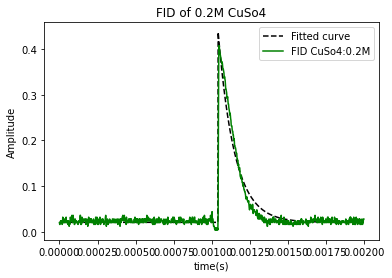

[[ 1.10474246e+11 -3.62413542e+06 -2.79672914e+07 -1.78127193e+00]
 [-3.62413581e+06  2.53185449e+04  9.17474255e+02  3.41677432e-02]
 [-2.79672914e+07  9.17474156e+02  7.08010615e+03  4.50940860e-04]
 [-1.78127299e+00  3.41677432e-02  4.50941127e-04  3.85862470e-07]]
[4.23990079e-01 9.31544859e+03 1.04010572e-03 2.05867638e-02]
159.11802183726664


In [157]:
#https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib
def f(x,a,b,x0,y0): 
    return (0.5 * (np.sign(x-x0) + 1)*a*np.exp(-b*(x-x0))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[0.5, 1.03,0.00104,0.001],bounds=(-np.inf, np.inf),maxfev=10000)#, bounds=(-np.inf, np.inf))
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve')
plt.plot(energy,count,'g',label='FID CuSo4:0.2M')
#fig=plt.figure(figsize=(20,6),dpi = 400)
#plt.figure(figsize=(8, 6), dpi=80)
plt.legend(loc='best')
plt.title('FID of 0.2M CuSo4')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')

plt.show()
print(cov)
print(pars)
print(np.sqrt(cov[1,1]))

In [543]:
data_10=np.loadtxt("G7//spin_echo0,2m.dat", comments="#", unpack=False, skiprows=1)

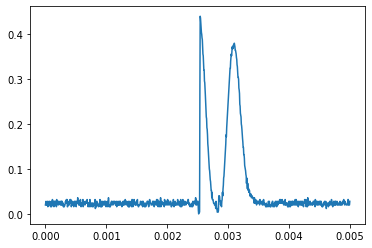

In [544]:
energy=data_10[:, 0]
count=data_10[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

[4.20000000e-01 2.52000000e-03 2.17306379e-02 5.53798758e+07
 3.60628480e-01 5.20481156e+07 3.10000000e-03]
0.0032576873256949315


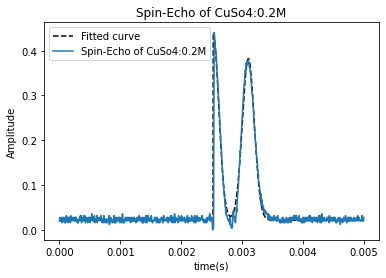

In [548]:
def f(x,a1,x0,y0,b1,a2,b2,x1): 
    return ( 0.5*(np.sign(x-x0) + 1)*(a1*(np.exp(-b1*(x-x0)**2))) + a2*(np.exp(-b2*(x-x1)**2))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[ 0.55,0.00253,0.01,7000,0.4,7000,0.0031],bounds=( ( 0.42,0.00252,0.01, -np.inf,0.35,-np.inf,0.0031 ),(0.55, 0.0027, 0.03,np.inf,0.40,np.inf,0.0036)),maxfev=10000)#bounds=(-np.inf, np.inf)          
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve') 
plt.plot(energy,count,label='Spin-Echo of CuSo4:0.2M')
print(pars)
plt.legend(loc='best')
plt.title('Spin-Echo of CuSo4:0.2M')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
#bounds=( ( 0.4,0.0025,0.01, -np.inf,0.35,-np.inf,0.0031 ),(0.5, 0.0026, 0.03,np.inf,0.40,np.inf,0.0035))
a1=pars[0]
a2=pars[4]
x1=pars[6]
x0=pars[1]
y0=pars[2]
b=-(np.log((a2/a1)-y0))/(x1-x0)
print(1/b)



In [33]:
data_11=np.loadtxt("G7//New folder//cp0,2.dat", comments="#", unpack=False, skiprows=1)

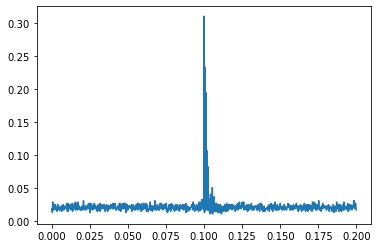

In [34]:
energy=data_11[:, 0]
count=data_11[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [38]:
data_13=np.loadtxt("G7//cp0,2.dat", comments="#", unpack=False, skiprows=1)

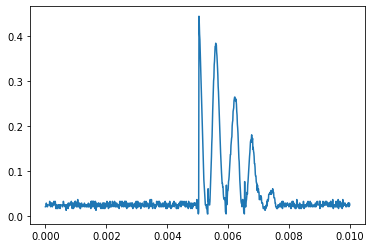

In [39]:
energy=data_13[:, 0]
count=data_13[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [33]:
data_14=np.loadtxt("G7//New folder//mg0,2.dat", comments="#", unpack=False, skiprows=1)

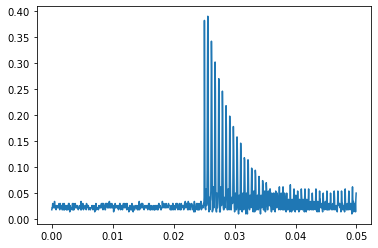

In [34]:
energy=data_14[:, 0]
count=data_14[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [37]:
data_15=np.loadtxt("G7//MG0,02M", comments="#", unpack=False, skiprows=1)

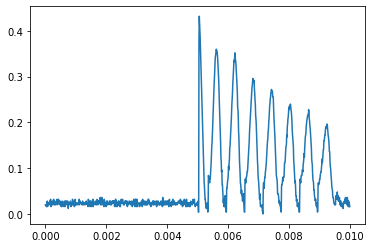

In [38]:
energy=data_15[:, 0]
count=data_15[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [573]:
data_16=np.loadtxt("G7//inv_recov_0,2m.dat", comments="#", unpack=False, skiprows=1)

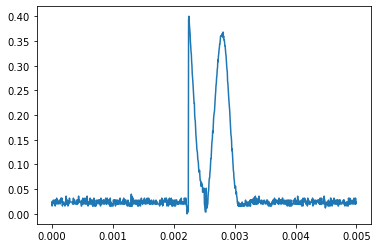

In [574]:
energy=data_16[:, 0]
count=data_16[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

[3.90000000e-01 2.23000000e-03 2.17883337e-02 5.66753844e+07
 3.51315866e-01 4.41046372e+07 2.79320047e-03]
0.00014080011635319808


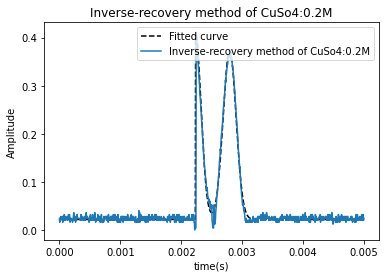

In [583]:
def f(x,a1,x0,y0,b1,a2,b2,x1): 
    return ( 0.5*(np.sign(x-x0) + 1)*(a1*(np.exp(-b1*(x-x0)**2))) + a2*(np.exp(-b2*(x-x1)**2))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[ 0.39,0.00235,0.01,7000,0.35,6500,0.0025],bounds=( ( 0.39,0.00223,0.01, -np.inf,0.35,-np.inf,0.0024 ),(0.43, 0.00235, 0.03,np.inf,0.37,np.inf,0.003)),maxfev=10000)#bounds=(-np.inf, np.inf)          
# plt.figure(dpi=120)
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve') 
plt.plot(energy,count,label='Inverse-recovery method of CuSo4:0.2M')
print(pars)

plt.legend(loc='best')
plt.title('Inverse-recovery method of CuSo4:0.2M')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
x1=pars[6]
x0=pars[1]
period=(x1-x0)/2
rise_time=(period/2)
print(rise_time)






#bounds=( ( 0.39,0.00251,0.01, -np.inf,0.35,-np.inf,0.0031 ),(0.43, 0.0027, 0.03,np.inf,0.39,np.inf,0.0036))

In [446]:
data_17=np.loadtxt("G7//FID_0.05_15Uhr13_pnmr.dat", comments="#", unpack=False, skiprows=1)

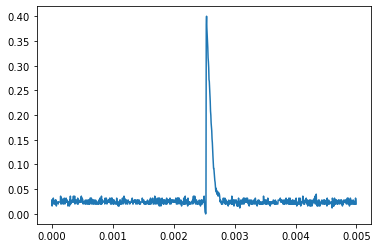

In [171]:
energy=data_17[:, 0]
count=data_17[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

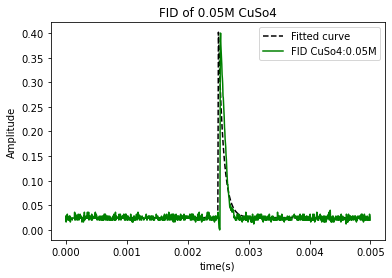

[[2.59188724e-04 7.78202286e+00 2.41630098e-14 1.30663631e-07]
 [7.78202286e+00 4.54782871e+05 7.48386850e-10 1.26859890e-01]
 [2.41630098e-14 7.48386850e-10 3.54379277e-23 2.03061305e-16]
 [1.30663631e-07 1.26859890e-01 2.03061305e-16 1.02484525e-06]]
[4.0e-01 1.2e+04 2.5e-03 2.5e-02]
674.3759120651353


In [176]:
def f(x,a,b,x0,y0): 
    return (a/2 * (np.sign(x-x0) + 1)*np.exp(-b*(x-x0))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[0.4,12000,0.0025,0.025],bounds=(-np.inf, np.inf),maxfev=10000)#, bounds=(-np.inf, np.inf))
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve')
plt.plot(energy,count,'g',label='FID CuSo4:0.05M')
plt.legend(loc='best')
plt.title('FID of 0.05M CuSo4')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.show()
print(cov)
print(pars)
print(np.sqrt(cov[1,1]))




In [500]:
data_18=np.loadtxt("G7//spin_echo0,5.dat", comments="#", unpack=False, skiprows=1)

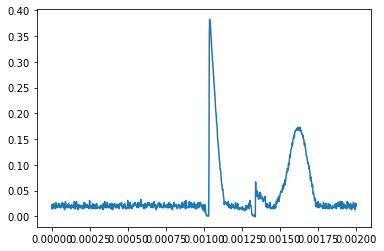

In [501]:
energy=data_18[:, 0]
count=data_18[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [584]:
data_19=np.loadtxt("G7//spin_echo0,05mM", comments="#", unpack=False, skiprows=1)

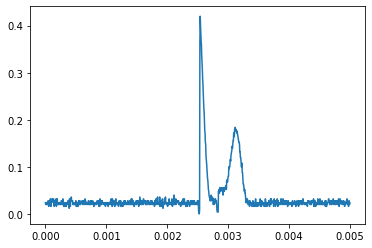

In [585]:
energy=data_19[:, 0]
count=data_19[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

[4.00000000e-01 2.51000000e-03 2.17198454e-02 8.64503842e+07
 1.53912483e-01 6.57841203e+07 3.11806254e-03]
0.0006001505045483473


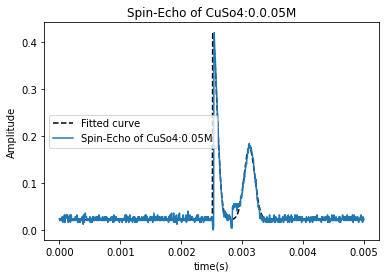

In [589]:
def f(x,a1,x0,y0,b1,a2,b2,x1): 
    return ( 0.5*(np.sign(x-x0) + 1)*(a1*(np.exp(-b1*(x-x0)**2))) + a2*(np.exp(-b2*(x-x1)**2))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[ 0.5,0.00251,0.01,7000,0.17,6500,0.0031],bounds=( ( 0.4,0.00251,0.01, -np.inf,0.15,-np.inf,0.0031 ),(0.5, 0.0027, 0.03,np.inf,0.40,np.inf,0.0036)),maxfev=10000)#bounds=(-np.inf, np.inf)          
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve') 
plt.plot(energy,count,label='Spin-Echo of CuSo4:0.05M')
print(pars)
plt.legend(loc='best')
plt.title('Spin-Echo of CuSo4:0.0.05M')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
#bounds=( ( 0.4,0.0025,0.01, -np.inf,0.19,-np.inf,0.0031 ),(0.5, 0.0026, 0.03,np.inf,0.40,np.inf,0.0036)) 
a1=pars[0]
a2=pars[4]
x1=pars[6]
x0=pars[1]
y0=pars[2]
b=-(np.log((a2/a1)-y0))/(x1-x0)
print(1/b)




In [411]:
data_20=np.loadtxt("G7//New folder//cp0,5.dat", comments="#", unpack=False, skiprows=1)

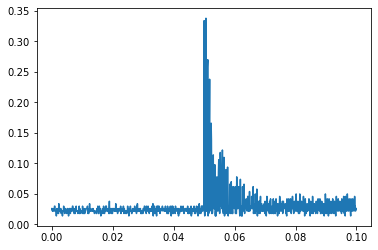

In [56]:
energy=data_20[:, 0]
count=data_20[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [57]:
data_21=np.loadtxt("G7//New folder//mg0,5(good).dat", comments="#", unpack=False, skiprows=1)

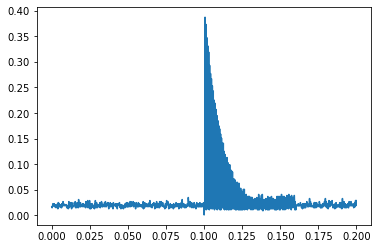

In [58]:
energy=data_21[:, 0]
count=data_21[:, 1]
plt.figure()
plt.plot(energy,count,label='recorded data')

In [590]:
data_22=np.loadtxt("G7//inve.recov0,05M", comments="#", unpack=False, skiprows=1)

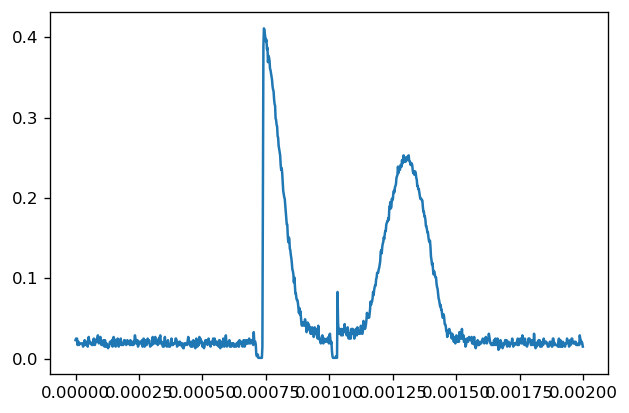

In [591]:
energy=data_22[:, 0]
count=data_22[:, 1]
plt.figure(dpi=120)
plt.plot(energy,count,label='recorded data')

[4.10000000e-01 7.30000000e-04 2.00000000e-02 9.97455200e+07
 2.31714109e-01 8.17573927e+07 1.30205000e-03]
0.00015201563433647292


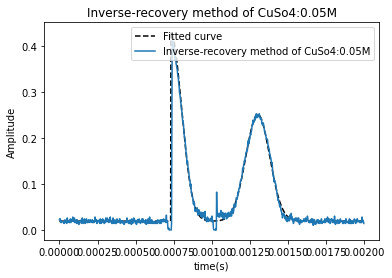

In [593]:
def f(x,a1,x0,y0,b1,a2,b2,x1): 
    return ( 0.5*(np.sign(x-x0) + 1)*(a1*(np.exp(-b1*(x-x0)**2))) + a2*(np.exp(-b2*(x-x1)**2))) +y0
pars, cov = curve_fit(f, xdata=energy, ydata=count, p0=[ 0.44,0.000751,0.03,7000,0.24,6500,0.00139],bounds=( ( 0.41,0.00073,0.02, -np.inf,0.23,-np.inf,0.00127 ),(0.45, 0.000752, 0.03,np.inf,0.26,np.inf,0.00139)),maxfev=10000)#bounds=(-np.inf, np.inf)          
plt.plot(energy, f(energy, *pars), 'k--',label= 'Fitted curve') 
plt.plot(energy,count,label='Inverse-recovery method of CuSo4:0.05M')
print(pars)
plt.legend(loc='best')
plt.title('Inverse-recovery method of CuSo4:0.05M')
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
#bounds=( ( 0.39,0.00251,0.01, -np.inf,0.35,-np.inf,0.0031 ),(0.43, 0.0027, 0.03,np.inf,0.39,np.inf,0.0036))
period=(x1-x0)/2
rise_time=(period/2)
print(rise_time)



In [450]:
maxfev=10000
a1*(np.exp(-b1*(x-x0)**2))

NameError: name 'b1' is not defined

In [399]:
np.log(2)

0.6931471805599453

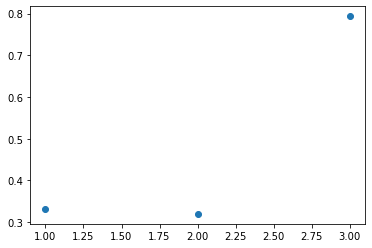

In [675]:
conc=np.array([0.05,0.1,0.2])
#inverse_time=1/x 
t=np.array([0.17,0.15,0.12])

plt.scatter(x,1/y)

[16.38655462  5.04901961]


Text(0, 0.5, '(1)/ T(ms)')

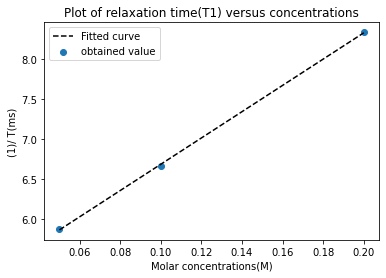

In [676]:
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

pars, pcov = curve_fit(f, conc,(1/t),p0=[1,0] ) # your data x, y to fit
plt.plot(conc, f(conc, *pars), 'k--',label= 'Fitted curve') 
plt.scatter(conc,(1/t),label='obtained value')
print(pars)
plt.legend(loc='best')
plt.title('Plot of relaxation time(T1) versus concentrations')
plt.xlabel('Molar concentrations(M)')
plt.ylabel('(1)/ T(ms)')

In [687]:
x=np.array([1, 2, 3])
print(1/x)

[1.         0.5        0.33333333]


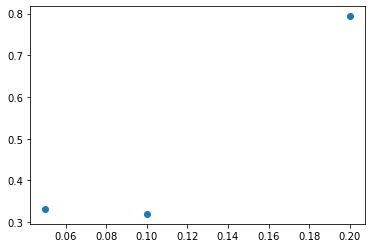

In [691]:
conc=np.array([0.05,0.1,0.2])
#inverse_time=1/x 
t=np.array([3.02,3.13,1.26])
plt.scatter(conc,1/t)

C:\Users\localadmin\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[-2.15622353e+03 -1.54016802e-03  2.15631755e+03]


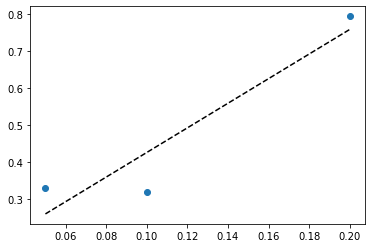

In [692]:
def test(x, a, b,c):
    return a*np.exp(b*x)+c
 
pars, param_cov = curve_fit(test, conc, 1/t,p0=[0.8,150,0.3],bounds=(-np.inf, +np.inf), maxfev=10000)
plt.plot(conc, test(conc, *pars), 'k--',label= 'Fitted curve') 
plt.scatter(conc,(1/t),label='obtained value')
print(pars)

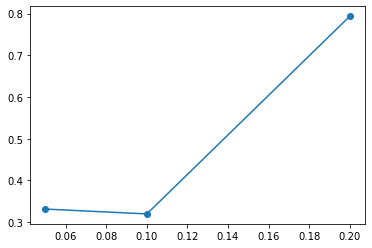

In [693]:
p2 = np.poly1d(np.polyfit(conc,1/t, 2))
plt.scatter(conc,1/t)
plt.plot(conc,p2(conc))